# Decision Tree Classifiers
Build a model to predict riding lawn mower ownership. Use the RidingMowers.csv file (same as in kNN lab) to train your model. Use decision tree classifier (DecisionTreeClassifier from sklearn.tree) to build the model.

In [30]:
!pip install dmba-0.0.18.tar.gz 

Processing ./dmba-0.0.18.tar.gz
DEPRECATION: Source distribution is being reinstalled despite an installed package having the same name and version as the installed package. pip 21.2 will remove support for this functionality. A possible replacement is use --force-reinstall. You can find discussion regarding this at https://github.com/pypa/pip/issues/8711.
  Created wheel for dmba: filename=dmba-0.0.18-py3-none-any.whl size=11813673 sha256=2ed4a3a5542cfbcb6cb3c394f6bc9b40539abf284c2e0feb57744b2d5afaa893
  Stored in directory: /root/.cache/pip/wheels/ca/05/fc/f2ca065e4013b58697d0e6b28c1456e94d02bf943d79585d77
Successfully built dmba
  Attempting uninstall: dmba
    Found existing installation: dmba 0.0.18
    Uninstalling dmba-0.0.18:
      Successfully uninstalled dmba-0.0.18


In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [32]:
mower_df = pd.read_csv('RidingMowers.csv')


In [33]:
mower_df.head()

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


In [34]:
mower_df.describe()

,Income,Lot_Size
count,24.000000,24.000000
mean,68.437500,18.950000
std,19.793144,2.428275
min,33.000000,14.000000
25%,52.350000,17.500000
50%,64.800000,19.000000
75%,83.100000,20.800000
max,110.100000,23.600000


In [35]:
excludeColumns = ('Ownership') #prep data excluding target 
predictors = [s for s in mower_df.columns if s not in excludeColumns]
outcome = 'Ownership'

In [36]:
X = mower_df[predictors]
Y = mower_df[outcome]

In [37]:
train_X, valid_X, train_Y, Valid_Y = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [38]:
print(train_X.shape)
print(valid_X.shape)

(16, 2)
(8, 2)


In [39]:
dtree = DecisionTreeClassifier().fit(train_X, train_Y)

In [40]:
Y_valid_pred = dtree.predict(valid_X)

In [41]:
valid_X

,Income,Lot_Size
13,52.8,20.8
18,59.4,16.0
3,61.5,20.8
14,64.8,17.2
20,47.4,16.4
17,49.2,17.6
10,51.0,22.0
4,87.0,23.6


In [42]:
Y_valid_pred

array(['Nonowner', 'Owner', 'Owner', 'Nonowner', 'Nonowner', 'Nonowner',
       'Nonowner', 'Owner'], dtype=object)

In [53]:
print(classification_report(Valid_Y, Y_valid_pred))
print(confusion_matrix(Valid_Y, Y_valid_pred))

              precision    recall  f1-score   support

    Nonowner       0.80      0.80      0.80         5
       Owner       0.67      0.67      0.67         3

    accuracy                           0.75         8
   macro avg       0.73      0.73      0.73         8
weighted avg       0.75      0.75      0.75         8

[[4 1]
 [1 2]]


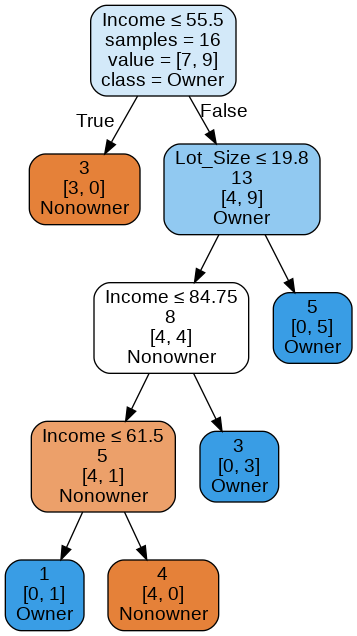

In [48]:
plotDecisionTree(dtree, feature_names=mower_df.columns[:2], class_names=dtree.classes_)

In [54]:
train_Y.head()

2        Owner
19    Nonowner
6        Owner
7        Owner
21    Nonowner
Name: Ownership, dtype: object

[[4 1]
 [1 2]]


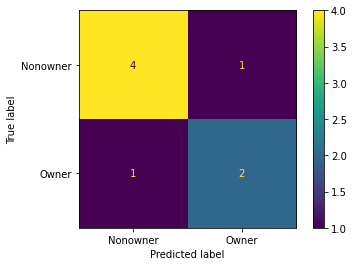

In [55]:
cm = confusion_matrix(Valid_Y, Y_valid_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = dtree.classes_)
disp.plot()